<a href="https://colab.research.google.com/github/SunYutongAmber/SignatureWork/blob/main/code/SW_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import ast
import numpy as np
import math
import time
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt 
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [2]:
df_cryp=pd.read_csv('https://raw.githubusercontent.com/SunYutongAmber/SunYutongAmber/main/data/tx_db.csv')
df_cryp.head()

,Unnamed: 0,date,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,attributes,skin_tone_color,img_url
0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...
1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...
2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...
3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...
4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,3,"['Black Lipstick', 'Green Eye Shadow', 'Mohawk...",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...


# Rarity Calculation

## Trait Rarity 

In [3]:
df_cryp['attributes']

0        ['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...
1        ['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...
2            ['Welding Goggles', 'Dark Hair', 'Cigarette']
3            ['Welding Goggles', 'Dark Hair', 'Cigarette']
4        ['Black Lipstick', 'Green Eye Shadow', 'Mohawk...
                               ...                        
17821                   ['Blonde Short', 'Classic Shades']
17822                  ['Frown', 'Do-rag', 'Small Shades']
17823        ['Clown Eyes Blue', 'Shadow Beard', 'Mohawk']
17824            ['Messy Hair', 'Earring', 'Normal Beard']
17825    ['Pipe', 'Straight Hair Blonde', 'Purple Lipst...
Name: attributes, Length: 17826, dtype: object

In [4]:
list_of_all_attributes=df_cryp['attributes'].map(ast.literal_eval).sum()
#list_of_attributes

In [5]:
#get the polishe list for all the attributes
list_of_attributes_remove_the_repeats=list(set(df_cryp['attributes'].map(ast.literal_eval).sum()))
list_of_attributes_remove_the_repeats = [x for x in list_of_attributes_remove_the_repeats if x != '']
list_of_attributes_remove_the_repeats

['Hoodie',
 'Handlebars',
 'Luxurious Beard',
 'Hot Lipstick',
 'Cigarette',
 'Purple Eye Shadow',
 'Rosy Cheeks',
 'Nerd Glasses',
 'Headband',
 'Smile',
 'Purple Hair',
 'Stringy Hair',
 'Mustache',
 'Pink With Hat',
 'Straight Hair Blonde',
 'Horned Rim Glasses',
 'Half Shaved',
 'Wild Blonde',
 'Wild Hair',
 'Classic Shades',
 'Purple Lipstick',
 'Orange Side',
 'Mohawk Thin',
 'Goat',
 'Front Beard Dark',
 'Black Lipstick',
 'Pilot Helmet',
 'Straight Hair Dark',
 'Eye Mask',
 'VR',
 'Wild White Hair',
 'Mohawk Dark',
 'Dark Hair',
 'Clown Eyes Blue',
 'Earring',
 'Silver Chain',
 'Mohawk',
 'Blue Eye Shadow',
 'Gold Chain',
 'Beanie',
 'Peak Spike',
 'Cowboy Hat',
 'Messy Hair',
 'Small Shades',
 'Pipe',
 'Blonde Bob',
 'Eye Patch',
 'Pigtails',
 'Knitted Cap',
 '3D Glasses',
 'Buck Teeth',
 'Muttonchops',
 'Chinstrap',
 'Clown Nose',
 'Normal Beard',
 'Top Hat',
 'Frumpy Hair',
 'Vape',
 'Tassle Hat',
 'Normal Beard Black',
 'Cap Forward',
 'Shadow Beard',
 'Green Eye Shadow',
 

In [6]:
number_of_cryptopunks=len(df_cryp)
number_of_cryptopunks

17826

In [7]:
traits_number_count=[]
trait_rarity_score=[]
for x in list_of_attributes_remove_the_repeats:
  a=list_of_all_attributes.count(x)
  traits_number_count.append(a)
  trait_rarity_score.append(number_of_cryptopunks/a)
#traits_number_count
#trait_rarity_score

## Normalization of Trait Rarity score

In [8]:
normalization_trait_rarity_score=100*(np.array(trait_rarity_score)-min(trait_rarity_score))/(max(trait_rarity_score)-min(trait_rarity_score))
normalization_trait_rarity_score

array([ 12.04065631,   6.05713819,   9.83286672,   3.10945219,
         1.47870572,   7.39042005,  17.52459474,   3.29348593,
         4.24600864,  10.28705249,  12.29944484,   2.55578385,
         5.42770006,  41.43866155,  18.42558656,   2.97432252,
        19.31548925,  44.35550983,   4.31984827,   3.08561397,
         3.09352813,  50.89922866,   3.14982989,   4.84489765,
         5.64579941,   2.71042675,  77.81175954,  13.1921112 ,
         6.00888146,   7.5850695 ,  26.65044477,   3.78824574,
        12.47781885,   4.40287747,   0.        ,  10.35054361,
         3.61918511,   7.77017274,  18.3315318 ,  53.77449905,
         6.1060782 ,  22.55727763,   3.82694478,   4.66875749,
         7.46015416,  26.08525128,   3.64478479,  35.90482791,
         4.18068666,  11.5134493 ,  41.43866155,   5.15868862,
         4.92872906,  10.16220442,   5.7219032 ,  23.5752305 ,
         3.8549842 ,   8.69137588,  16.32064933,   7.94384679,
         7.28798454,   3.30225786,   8.10420188,  10.16

In [9]:
df_traits = {'Traits':list_of_attributes_remove_the_repeats,
             'Number_Count': traits_number_count,
             'Traits_Rarity_Score': trait_rarity_score,
             'Normalized_Traits_Rarity_Score': normalization_trait_rarity_score}
df_traits=DataFrame(df_traits)

# Cryptopunk Rarity Score

## Rarest Trait Score Model

In [10]:
rarity_score1=[]

for i in range(len(df_cryp)):
  length=len(df_cryp['attributes'][i].replace("[","").replace("]","").replace("'","").split(', '))
  #print(length)
  #average_rarity=[]
  list_index=[]
  for x in df_cryp['attributes'][i].replace("[","").replace("]","").replace("'","").split(', '):
    #print(x)
    if x in list(df_traits['Traits']):
      #print(x)
      #a=df_traits[df_traits.Traits==x].index.tolist()
      a=list(df_traits['Traits']).index(x)
      list_index.append(a)
      #average_rarity.append(b)
      #print(average_rarity)

  b=[df_traits['Normalized_Traits_Rarity_Score'][j] for j in list_index]
  #print(b)
  #average_rarity.append(b)
  c=max(b,default = 0)
  #print(c)
  rarity_score1.append(c)

len(rarity_score1) 

17826

In [11]:
df_cryp['Rarity_Score_1_rarest'] = rarity_score1
df_cryp

,Unnamed: 0,date,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,attributes,skin_tone_color,img_url,Rarity_Score_1_rarest
0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689
1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689
2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485
3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485
4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,3,"['Black Lipstick', 'Green Eye Shadow', 'Mohawk...",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,8.104202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17821,2022-07-17,2292,2070,88.88,4656,Human,Female,Medium,2,"['Blonde Short', 'Classic Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,21.880604
17822,17822,2022-07-17,5922,916,88.00,4749,Human,Male,Medium,3,"['Frown', 'Do-rag', 'Small Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,6.622251
17823,17823,2022-07-18,107,1044,84.00,4569,Human,Male,Light,3,"['Clown Eyes Blue', 'Shadow Beard', 'Mohawk']",#F2A359,https://www.larvalabs.com/cryptopunks/cryptopu...,4.402877
17824,17824,2022-07-21,244,801,86.68,4755,Human,Male,Dark,3,"['Messy Hair', 'Earring', 'Normal Beard']",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,5.721903


## Average Trait Rarity Model

In [12]:
rarity_score2=[]

for i in range(len(df_cryp)):
  length=len(df_cryp['attributes'][i].replace("[","").replace("]","").replace("'","").split(', '))
  #print(length)
  #average_rarity=[]
  list_index=[]
  for x in df_cryp['attributes'][i].replace("[","").replace("]","").replace("'","").split(', '):
    #print(x)
    if x in list(df_traits['Traits']):
      #print(x)
      #a=df_traits[df_traits.Traits==x].index.tolist()
      a=list(df_traits['Traits']).index(x)
      list_index.append(a)
      #print(a)
      #print(list_index)
      #b=df_traits['Normalized_Traits_Rarity_Score'][a]
      #print(b)
      #average_rarity.append(b)
      #print(average_rarity)

  b=[df_traits['Normalized_Traits_Rarity_Score'][j] for j in list_index]
  #print(b)
  #average_rarity.append(b)
  c=sum(b)/length
  #print(len(c))
  rarity_score2.append(c)

len(rarity_score2) 

17826

In [13]:
df_cryp['Rarity_Score_2_Average'] = rarity_score2
df_cryp

,Unnamed: 0,date,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,attributes,skin_tone_color,img_url,Rarity_Score_1_rarest,Rarity_Score_2_Average
0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788
1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788
2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003
3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003
4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,3,"['Black Lipstick', 'Green Eye Shadow', 'Mohawk...",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,8.104202,4.654820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17821,2022-07-17,2292,2070,88.88,4656,Human,Female,Medium,2,"['Blonde Short', 'Classic Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,21.880604,12.483109
17822,17822,2022-07-17,5922,916,88.00,4749,Human,Male,Medium,3,"['Frown', 'Do-rag', 'Small Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,6.622251,5.319922
17823,17823,2022-07-18,107,1044,84.00,4569,Human,Male,Light,3,"['Clown Eyes Blue', 'Shadow Beard', 'Mohawk']",#F2A359,https://www.larvalabs.com/cryptopunks/cryptopu...,4.402877,3.774773
17824,17824,2022-07-21,244,801,86.68,4755,Human,Male,Dark,3,"['Messy Hair', 'Earring', 'Normal Beard']",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,5.721903,3.182949


## Statistical Rarity Model

In [14]:
rarity_score3=[]

for i in range(len(df_cryp)):
  length=len(df_cryp['attributes'][i].replace("[","").replace("]","").replace("'","").split(', '))
  #print(length)
  #average_rarity=[]
  list_index=[]
  for x in df_cryp['attributes'][i].replace("[","").replace("]","").replace("'","").split(', '):
    #print(x)
    if x in list(df_traits['Traits']):
      #print(x)
      #a=df_traits[df_traits.Traits==x].index.tolist()
      a=list(df_traits['Traits']).index(x)
      list_index.append(a)
      #average_rarity.append(b)
      #print(average_rarity)

  b=[df_traits['Normalized_Traits_Rarity_Score'][j] for j in list_index]
  #print(b)
  c=math.prod(b)
  #print(c)
  rarity_score3.append(c)

len(rarity_score3) 

17826

In [15]:
df_cryp['Rarity_Score_3_multiple'] = rarity_score3
df_cryp

,Unnamed: 0,date,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,attributes,skin_tone_color,img_url,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple
0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788,0.000000
1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788,0.000000
2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003,891.396281
3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003,891.396281
4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,3,"['Black Lipstick', 'Green Eye Shadow', 'Mohawk...",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,8.104202,4.654820,69.188677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17821,2022-07-17,2292,2070,88.88,4656,Human,Female,Medium,2,"['Blonde Short', 'Classic Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,21.880604,12.483109,67.515097
17822,17822,2022-07-17,5922,916,88.00,4749,Human,Male,Medium,3,"['Frown', 'Do-rag', 'Small Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,6.622251,5.319922,144.347171
17823,17823,2022-07-18,107,1044,84.00,4569,Human,Male,Light,3,"['Clown Eyes Blue', 'Shadow Beard', 'Mohawk']",#F2A359,https://www.larvalabs.com/cryptopunks/cryptopu...,4.402877,3.774773,52.620913
17824,17824,2022-07-21,244,801,86.68,4755,Human,Male,Dark,3,"['Messy Hair', 'Earring', 'Normal Beard']",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,5.721903,3.182949,0.000000


In [16]:
df_cryp.to_csv("gas_rarity_usd.csv")
df_cryp

,Unnamed: 0,date,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,attributes,skin_tone_color,img_url,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple
0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788,0.000000
1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788,0.000000
2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003,891.396281
3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003,891.396281
4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,3,"['Black Lipstick', 'Green Eye Shadow', 'Mohawk...",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,8.104202,4.654820,69.188677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17821,2022-07-17,2292,2070,88.88,4656,Human,Female,Medium,2,"['Blonde Short', 'Classic Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,21.880604,12.483109,67.515097
17822,17822,2022-07-17,5922,916,88.00,4749,Human,Male,Medium,3,"['Frown', 'Do-rag', 'Small Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,6.622251,5.319922,144.347171
17823,17823,2022-07-18,107,1044,84.00,4569,Human,Male,Light,3,"['Clown Eyes Blue', 'Shadow Beard', 'Mohawk']",#F2A359,https://www.larvalabs.com/cryptopunks/cryptopu...,4.402877,3.774773,52.620913
17824,17824,2022-07-21,244,801,86.68,4755,Human,Male,Dark,3,"['Messy Hair', 'Earring', 'Normal Beard']",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,5.721903,3.182949,0.000000


# Merge with Gas fee and ETH/USD data

## import data and pre-processing

In [17]:
df_gas=pd.read_csv('https://raw.githubusercontent.com/SunYutongAmber/SignatureWork/main/Data/AvgGasPrice.csv')
df_gas.head()

,Date(UTC),UnixTimeStamp,Value (Wei)
0,7/30/2015,1438214400,0
1,7/31/2015,1438300800,0
2,8/1/2015,1438387200,0
3,8/2/2015,1438473600,0
4,8/3/2015,1438560000,0


In [18]:
df_gas_ETH = {'date':df_gas['UnixTimeStamp'],
              'gas_eth_price':df_gas['Value (Wei)']*0.0042}
df_gas_ETH=DataFrame(df_gas_ETH)
df_gas_ETH

,date,gas_eth_price
0,1438214400,0.000000e+00
1,1438300800,0.000000e+00
2,1438387200,0.000000e+00
3,1438473600,0.000000e+00
4,1438560000,0.000000e+00
...,...,...
2760,1676678400,1.286364e+08
2761,1676764800,1.246275e+08
2762,1676851200,1.561191e+08
2763,1676937600,1.568683e+08


In [19]:
df_usd=pd.read_csv('https://raw.githubusercontent.com/SunYutongAmber/SignatureWork/main/Data/EtherPrice%3AUSD.csv')
df_usd.head()

,Date(UTC),UnixTimeStamp,Value
0,7/30/2015,1438214400,0.0
1,7/31/2015,1438300800,0.0
2,8/1/2015,1438387200,0.0
3,8/2/2015,1438473600,0.0
4,8/3/2015,1438560000,0.0


In [20]:
df_ETH_usd = {'date':df_usd['UnixTimeStamp'],
              'eth_usd_price':df_usd['Value']}
df_ETH_usd=DataFrame(df_ETH_usd)
df_ETH_usd

,date,eth_usd_price
0,1438214400,0.00
1,1438300800,0.00
2,1438387200,0.00
3,1438473600,0.00
4,1438560000,0.00
...,...,...
2760,1676678400,1691.98
2761,1676764800,1681.25
2762,1676851200,1703.53
2763,1676937600,1659.64


## change the date format 

In [21]:
new_date=[]
for i in range(len(df_cryp)):
  #转换成时间数组
  timeArray = time.strptime(df_cryp['date'][i], "%Y-%m-%d")
  #转换成时间戳
  timestamp = time.mktime(timeArray)
  new_date.append(timestamp)
len(new_date)

17826

In [22]:
df_cryp['timestamp']=new_date

In [23]:
#new_date1=[]
#for i in range(len(df_gas_ETH)):
  #转换成时间数组
#  timeArray = time.strptime(df_gas_ETH['date'][i], "%Y-%m-%d")
  #转换成时间戳
#  timestamp = time.mktime(timeArray)
#  new_date1.append(timestamp)
#len(new_date1)

In [24]:
#df_gas_ETH['timestamp']=new_date1

In [25]:
#new_date2=[]
#for i in range(len(df_ETH_usd)):
  #转换成时间数组
#  timeArray = time.strptime(df_ETH_usd['date'][i], "%Y-%m-%d")
  #转换成时间戳
#  timestamp = time.mktime(timeArray)
#  new_date2.append(timestamp)
#len(new_date2)

In [26]:
#df_ETH_usd['timestamp']=new_date2

## merge the three data

In [27]:
df_cryp=df_cryp.merge(df_gas_ETH,left_on = 'timestamp', right_on='date',how = 'left')#左连接，左侧DataFrame取全部，右侧DataFrame取部分

In [28]:
df_cryp=df_cryp.merge(df_ETH_usd,left_on = 'timestamp', right_on='date',how = 'left')#左连接，左侧DataFrame取全部，右侧DataFrame取部分

In [29]:
df_cryp.to_csv('2017to2022_rarity_gas_usd_price.csv')

## Stationary Test

In [30]:
df_cryp['price']=df_cryp['eth_price']*df_cryp['eth_usd_price']
df_cryp

,Unnamed: 0,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,...,img_url,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple,timestamp,date_y,gas_eth_price,date,eth_usd_price,price
0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,4,...,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788,0.000000,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,9.8055
1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,4,...,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788,0.000000,1.499040e+09,1499040000,1.180929e+08,1499040000,276.41,135.4409
2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,3,...,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003,891.396281,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,13.0740
3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,3,...,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003,891.396281,1.553040e+09,1553040000,5.115253e+07,1553040000,140.22,138.8178
4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,3,...,https://www.larvalabs.com/cryptopunks/cryptopu...,8.104202,4.654820,69.188677,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,81.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17821,2022-07-17,2292,2070,88.88,4656,Human,Female,Medium,2,...,https://www.larvalabs.com/cryptopunks/cryptopu...,21.880604,12.483109,67.515097,1.658016e+09,1658016000,1.046061e+08,1658016000,1337.97,118918.7736
17822,17822,2022-07-17,5922,916,88.00,4749,Human,Male,Medium,3,...,https://www.larvalabs.com/cryptopunks/cryptopu...,6.622251,5.319922,144.347171,1.658016e+09,1658016000,1.046061e+08,1658016000,1337.97,117741.3600
17823,17823,2022-07-18,107,1044,84.00,4569,Human,Male,Light,3,...,https://www.larvalabs.com/cryptopunks/cryptopu...,4.402877,3.774773,52.620913,1.658102e+09,1658102400,1.475703e+08,1658102400,1583.55,133018.2000
17824,17824,2022-07-21,244,801,86.68,4755,Human,Male,Dark,3,...,https://www.larvalabs.com/cryptopunks/cryptopu...,5.721903,3.182949,0.000000,1.658362e+09,1658361600,1.027865e+08,1658361600,1575.68,136579.9424


## Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)：

In [31]:
from statsmodels.tsa.stattools import adfuller, kpss
df = df_cryp

# KPSS Test
result = kpss(df.price.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 13.332689
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## Log_transform and normalization

In [32]:
df_cryp['Log_price']=np.log(df_cryp['price'])
df_cryp['Log_price']

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0         2.282943
1         4.908535
2         2.570626
3         4.933162
4         4.403207
           ...    
17821    11.686196
17822    11.676246
17823    11.798241
17824    11.824665
17825    12.045968
Name: Log_price, Length: 17826, dtype: float64

## correlation test

                       gas_eth_price  eth_usd_price  Rarity_Score_1_rarest
gas_eth_price               1.000000       0.237472              -0.008450
eth_usd_price               0.237472       1.000000              -0.031512
Rarity_Score_1_rarest      -0.008450      -0.031512               1.000000


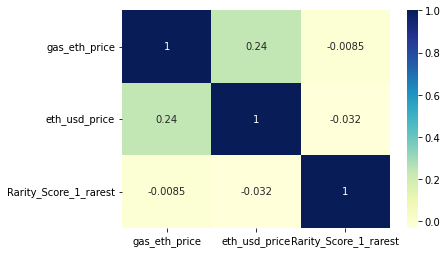

In [33]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

df=df_cryp[['gas_eth_price','eth_usd_price','Rarity_Score_1_rarest']]
# import file with data
# data = pd.read_csv("C:\\Users\\Vanshi\\Desktop\\bestsellers.csv")

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df.corr())

# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

                        gas_eth_price  eth_usd_price  Rarity_Score_2_Average
gas_eth_price                1.000000       0.237472               -0.017729
eth_usd_price                0.237472       1.000000               -0.037558
Rarity_Score_2_Average      -0.017729      -0.037558                1.000000


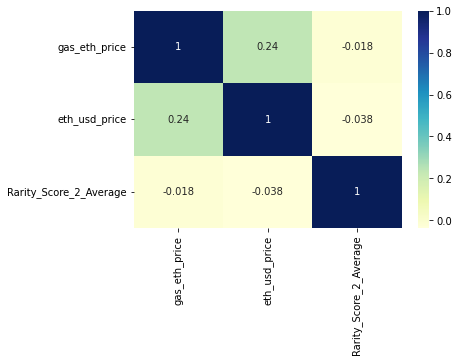

In [34]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

df=df_cryp[['gas_eth_price','eth_usd_price','Rarity_Score_2_Average']]
# import file with data
# data = pd.read_csv("C:\\Users\\Vanshi\\Desktop\\bestsellers.csv")

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df.corr())

# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

                         gas_eth_price  eth_usd_price  Rarity_Score_3_multiple
gas_eth_price                 1.000000       0.237472                -0.003829
eth_usd_price                 0.237472       1.000000                -0.008692
Rarity_Score_3_multiple      -0.003829      -0.008692                 1.000000


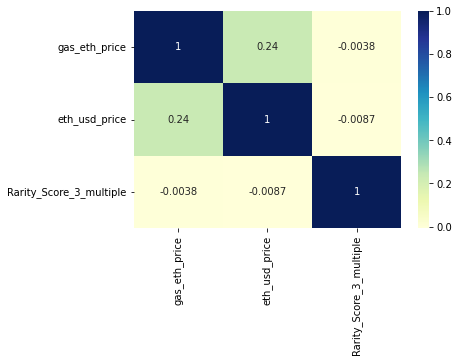

In [35]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

df=df_cryp[['gas_eth_price','eth_usd_price','Rarity_Score_3_multiple']]
# import file with data
# data = pd.read_csv("C:\\Users\\Vanshi\\Desktop\\bestsellers.csv")

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df.corr())

# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

## normalization

In [36]:
df_cryp

,Unnamed: 0,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,...,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple,timestamp,date_y,gas_eth_price,date,eth_usd_price,price,Log_price
0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,4,...,5.158689,3.635788,0.000000,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,9.8055,2.282943
1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,4,...,5.158689,3.635788,0.000000,1.499040e+09,1499040000,1.180929e+08,1499040000,276.41,135.4409,4.908535
2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,3,...,48.311485,20.756003,891.396281,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,13.0740,2.570626
3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,3,...,48.311485,20.756003,891.396281,1.553040e+09,1553040000,5.115253e+07,1553040000,140.22,138.8178,4.933162
4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,3,...,8.104202,4.654820,69.188677,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,81.7125,4.403207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17821,2022-07-17,2292,2070,88.88,4656,Human,Female,Medium,2,...,21.880604,12.483109,67.515097,1.658016e+09,1658016000,1.046061e+08,1658016000,1337.97,118918.7736,11.686196
17822,17822,2022-07-17,5922,916,88.00,4749,Human,Male,Medium,3,...,6.622251,5.319922,144.347171,1.658016e+09,1658016000,1.046061e+08,1658016000,1337.97,117741.3600,11.676246
17823,17823,2022-07-18,107,1044,84.00,4569,Human,Male,Light,3,...,4.402877,3.774773,52.620913,1.658102e+09,1658102400,1.475703e+08,1658102400,1583.55,133018.2000,11.798241
17824,17824,2022-07-21,244,801,86.68,4755,Human,Male,Dark,3,...,5.721903,3.182949,0.000000,1.658362e+09,1658361600,1.027865e+08,1658361600,1575.68,136579.9424,11.824665


In [37]:
df_cryp['eth_usd_price']=np.log(df_cryp['eth_usd_price'])
df_cryp['gas_eth_price']=np.log(df_cryp['gas_eth_price'])
df_cryp['Rarity_Score_1_rarest']=np.log(df_cryp['Rarity_Score_1_rarest'])
df_cryp['Rarity_Score_2_Average']=np.log(df_cryp['Rarity_Score_2_Average'])
df_cryp['Rarity_Score_3_multiple']=np.log(df_cryp['Rarity_Score_3_multiple'])

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Hedonic Pricing Model for Rarity, Gas Fee and ETH/USD (Prediction) 

multiple regression: https://blog.csdn.net/HHTNAN/article/details/78843722


## sort the data with timestamp and then split training and testing set

In [38]:
df_cryp.sort_values('timestamp',inplace=True)
df_cryp=df_cryp.dropna()
df_cryp

,Unnamed: 0,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,...,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple,timestamp,date_y,gas_eth_price,date,eth_usd_price,price,Log_price
0,0,2017-06-23,1406,1218,0.030,6548,Human,Male,Albino,4,...,1.640682,1.290826,-inf,1.498176e+09,1498176000,18.963197,1498176000,5.789501,9.8055,2.282943
30,30,2017-06-23,1406,1218,0.116,8781,Human,Male,Light,4,...,1.890435,1.493317,5.824431,1.498176e+09,1498176000,18.963197,1498176000,5.789501,37.9146,3.635336
29,29,2017-06-23,1406,166,0.010,3134,Human,Male,Medium,3,...,2.908623,2.190688,5.732238,1.498176e+09,1498176000,18.963197,1498176000,5.789501,3.2685,1.184331
28,28,2017-06-23,166,4722,0.100,5056,Human,Male,Albino,4,...,3.984799,2.879092,-inf,1.498176e+09,1498176000,18.963197,1498176000,5.789501,32.6850,3.486916
26,26,2017-06-23,1406,1218,0.060,6208,Human,Male,Medium,2,...,1.194606,0.501459,-inf,1.498176e+09,1498176000,18.963197,1498176000,5.789501,19.6110,2.976091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12450,12450,2022-07-26,980,1939,94.000,9099,Human,Male,Light,4,...,1.691515,1.118827,-inf,1.658794e+09,1658793600,18.570040,1658793600,7.279050,136263.3400,11.822345
17440,17440,2022-07-26,5318,4950,69.000,4430,Human,Female,Albino,2,...,1.550899,1.455201,2.900266,1.658794e+09,1658793600,18.570040,1658793600,7.279050,100023.0900,11.513156
17613,17613,2022-07-26,3002,1044,94.900,5600,Human,Male,Albino,3,...,2.908623,2.191850,5.798883,1.658794e+09,1658793600,18.570040,1658793600,7.279050,137567.9890,11.831874
13214,13214,2022-07-27,3096,1028,69.690,6221,Human,Female,Dark,4,...,2.960907,1.977492,-inf,1.658880e+09,1658880000,18.410773,1658880000,7.400547,114074.1672,11.644604


In [39]:
df_cryp=df_cryp[df_cryp['Log_price']<10000]
df_cryp=df_cryp[df_cryp['Log_price']>-10000]
df_cryp=df_cryp[df_cryp['Rarity_Score_1_rarest']<10000]
df_cryp=df_cryp[df_cryp['Rarity_Score_1_rarest']>-10000]
df_cryp=df_cryp[df_cryp['Rarity_Score_2_Average']<10000]
df_cryp=df_cryp[df_cryp['Rarity_Score_2_Average']>-10000]
df_cryp=df_cryp[df_cryp['Rarity_Score_3_multiple']<10000]
df_cryp=df_cryp[df_cryp['Rarity_Score_3_multiple']>-10000]
df_cryp=df_cryp[df_cryp['gas_eth_price']<10000]
df_cryp=df_cryp[df_cryp['gas_eth_price']>-10000]
df_cryp=df_cryp[df_cryp['eth_usd_price']<10000]
df_cryp=df_cryp[df_cryp['eth_usd_price']>-10000]
len(df_cryp)

12806

In [40]:
#df_cryp['eth_usd_price']=df_cryp['eth_usd_price'].apply(lambda x: float(x.replace(',',''))) 

Time Series data train and test split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html


In [41]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [42]:
# change the train and test split parameters 
tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

In [43]:
for train_idx, test_idx in tss.split(df_cryp):
    print("TRAIN:", train_idx, "TEST:", test_idx)

TRAIN: [   0    1    2 ... 4267 4268 4269] TEST: [4270 4271 4272 ... 8535 8536 8537]
TRAIN: [   0    1    2 ... 8535 8536 8537] TEST: [ 8538  8539  8540 ... 12803 12804 12805]


In [44]:
train_df = df_cryp.filter(items=train_idx, axis=0)
test_df =  df_cryp.filter(items=test_idx, axis=0)    

In [45]:
train_df.head()
test_df.head()

,Unnamed: 0,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,...,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple,timestamp,date_y,gas_eth_price,date,eth_usd_price,price,Log_price
8544,8544,2020-09-14,5801,1892,2.00,9886,Human,Male,Dark,3,...,1.730912,1.464599,4.303642,1.600042e+09,1600041600,20.546410,1600041600,5.932882,754.4800,6.626029
8545,8545,2020-09-14,1532,5687,1.99,2057,Human,Male,Light,2,...,2.072398,1.813496,3.535618,1.600042e+09,1600041600,20.546410,1600041600,5.932882,750.7076,6.621016
8546,8546,2020-09-14,1532,5687,1.99,5849,Human,Male,Light,2,...,1.463220,1.337906,2.657827,1.600042e+09,1600041600,20.546410,1600041600,5.932882,750.7076,6.621016
8547,8547,2020-09-14,1532,5261,1.99,7307,Human,Male,Light,3,...,1.463220,1.261905,3.747843,1.600042e+09,1600041600,20.546410,1600041600,5.932882,750.7076,6.621016
8548,8548,2020-10-06,2913,2496,4.95,7307,Human,Male,Light,3,...,1.463220,1.261905,3.747843,1.601942e+09,1601942400,19.944078,1601942400,5.831442,1687.2075,7.430830


## define X_train, X_test, y_train, and y_test

In [46]:
cols_R = ['Log_price','Rarity_Score_1_rarest','Rarity_Score_2_Average','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price']
cols_R

['Log_price',
 'Rarity_Score_1_rarest',
 'Rarity_Score_2_Average',
 'Rarity_Score_3_multiple',
 'gas_eth_price',
 'eth_usd_price']

In [47]:
df_R_train = train_df[cols_R]
df_R_test = test_df[cols_R]
df_R_test.head()

,Log_price,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple,gas_eth_price,eth_usd_price
8544,6.626029,1.730912,1.464599,4.303642,20.546410,5.932882
8545,6.621016,2.072398,1.813496,3.535618,20.546410,5.932882
8546,6.621016,1.463220,1.337906,2.657827,20.546410,5.932882
8547,6.621016,1.463220,1.261905,3.747843,20.546410,5.932882
8548,7.430830,1.463220,1.261905,3.747843,19.944078,5.831442


In [48]:
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## Hedonic regression with Rarity Score 1

In [49]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

#x = [1, 3, 5, 6, 8, 3, 4, 5, 1, 3, 5, 6, 8, 3, 4, 5, 0, 1, 0, 1, 1, 4, 5, 7]
#y = [0, 1, 0, 1, 1, 4, 5, 7, 0, 1, 0, 1, 1, 4, 5, 7, 0, 1, 0, 1, 1, 4, 5, 7]
#d = { "x": pd.Series(x), "y": pd.Series(y)}
#df = pd.DataFrame(d)
#df['xsqr'] = df['x']**2  
mod = smf.ols('Log_price ~ Rarity_Score_1_rarest',data=df_R_train)
res = mod.fit()
print(res.summary())

mod2= smf.ols('Log_price ~ Rarity_Score_1_rarest+gas_eth_price',data=df_R_train)
res2 = mod2.fit()
print(res2.summary())

mod3= smf.ols('Log_price ~ Rarity_Score_1_rarest+gas_eth_price+eth_usd_price',data=df_R_train)
res3 = mod3.fit()
print(res3.summary())

mod4= smf.ols('Log_price ~ gas_eth_price+eth_usd_price',data=df_R_train)
res4 = mod4.fit()
print(res4.summary())

dfoutput = summary_col([res,res2,res3,res4],stars=True)
print(dfoutput)

                            OLS Regression Results                            
Dep. Variable:              Log_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1963
Date:                Mon, 13 Mar 2023   Prob (F-statistic):              0.658
Time:                        10:00:43   Log-Likelihood:                -16531.
No. Observations:                6155   AIC:                         3.307e+04
Df Residuals:                    6153   BIC:                         3.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 8.02

In [50]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_1_rarest','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['Log_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_1_rarest','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['Log_price'])

RMSE by hand: [0.89536527]


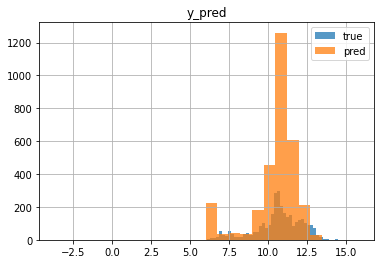

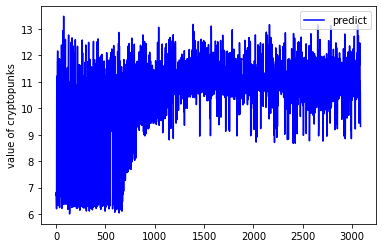

In [51]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])

#prediction graph
fig, ax = plt.subplots()
y_test.hist(ax=ax, label='true', alpha=.75,bins=100)
y_pred.hist(ax=ax, label='pred', alpha=.75)
ax.legend()
fig.show()

#evaluate regression model performance：均方根误差(Root Mean Squared Error, RMSE)
y_pred=y_pred.values.tolist()
sum_mean=0
for i in range(len(y_pred)):
  sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/len(y_pred))  #这个10是你测试级的数量
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)
#做ROC曲线
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict",alpha=1)
#plt.plot(range(len(y_pred)),y_test,'r',label="test",alpha=0.3)
plt.legend(loc="upper right") #显示图中的标签
#plt.xlabel("the number of sales")
plt.ylabel('value of cryptopunks')
plt.show()

## Hedonic regression with Rarity Score 2

In [52]:
mod = smf.ols('Log_price ~ Rarity_Score_2_Average',data=df_R_train)
res = mod.fit()
print(res.summary())

mod2= smf.ols('Log_price ~ Rarity_Score_2_Average+gas_eth_price',data=df_R_train)
res2 = mod2.fit()
print(res2.summary())

mod3= smf.ols('Log_price ~ Rarity_Score_2_Average+gas_eth_price+eth_usd_price',data=df_R_train)
res3 = mod3.fit()
print(res3.summary())

mod4= smf.ols('Log_price ~ gas_eth_price+eth_usd_price',data=df_R_train)
res4 = mod4.fit()
print(res4.summary())

dfoutput = summary_col([res,res2,res3,res4],stars=True)
print(dfoutput)

                            OLS Regression Results                            
Dep. Variable:              Log_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3526
Date:                Mon, 13 Mar 2023   Prob (F-statistic):              0.553
Time:                        10:00:46   Log-Likelihood:                -16531.
No. Observations:                6155   AIC:                         3.307e+04
Df Residuals:                    6153   BIC:                         3.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8

In [53]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_2_Average','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['Log_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_2_Average','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['Log_price'])

RMSE by hand: [0.89160571]


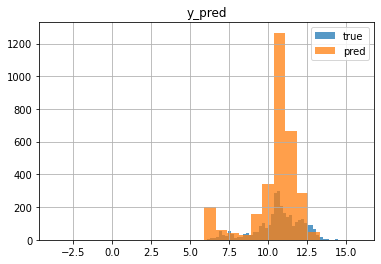

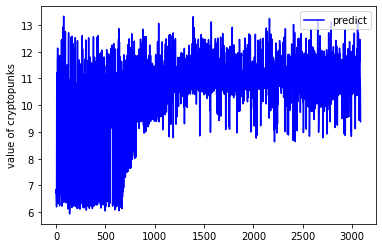

In [54]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])

#prediction graph
fig, ax = plt.subplots()
y_test.hist(ax=ax, label='true', alpha=.75,bins=100)
y_pred.hist(ax=ax, label='pred', alpha=.75)
ax.legend()
fig.show()

#evaluate regression model performance：均方根误差(Root Mean Squared Error, RMSE)
y_pred=y_pred.values.tolist()
sum_mean=0
for i in range(len(y_pred)):
  sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/len(y_pred))  #这个10是你测试级的数量
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)

#做ROC曲线
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict",alpha=1)
#plt.plot(range(len(y_pred)),y_test,'r',label="test",alpha=0.3)
plt.legend(loc="upper right") #显示图中的标签
#plt.xlabel("the number of sales")
plt.ylabel('value of cryptopunks')
plt.show()

## Hedonic regression with Rarity Score 3

In [55]:
mod = smf.ols('Log_price ~ Rarity_Score_3_multiple',data=df_R_train)
res = mod.fit()
print(res.summary())

mod2= smf.ols('Log_price ~ Rarity_Score_3_multiple+gas_eth_price',data=df_R_train)
res2 = mod2.fit()
print(res2.summary())

mod3= smf.ols('Log_price ~ Rarity_Score_3_multiple+gas_eth_price+eth_usd_price',data=df_R_train)
res3 = mod3.fit()
print(res3.summary())

mod4= smf.ols('Log_price ~ gas_eth_price+eth_usd_price',data=df_R_train)
res4 = mod4.fit()
print(res4.summary())

dfoutput = summary_col([res,res2,res3,res4],stars=True)
print(dfoutput)

                            OLS Regression Results                            
Dep. Variable:              Log_price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.028
Date:                Mon, 13 Mar 2023   Prob (F-statistic):             0.0448
Time:                        10:00:50   Log-Likelihood:                -16529.
No. Observations:                6155   AIC:                         3.306e+04
Df Residuals:                    6153   BIC:                         3.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [57]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['Log_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['Log_price'])

RMSE by hand: [0.90322237]


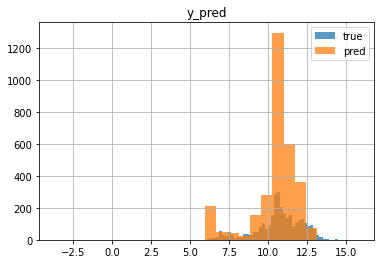

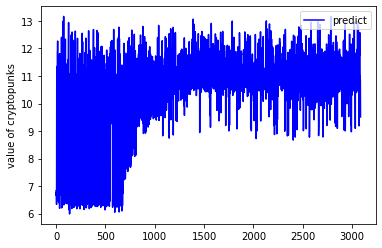

In [58]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])

#prediction graph
fig, ax = plt.subplots()
y_test.hist(ax=ax, label='true', alpha=.75,bins=100)
y_pred.hist(ax=ax, label='pred', alpha=.75)
ax.legend()
fig.show()

#evaluate regression model performance：均方根误差(Root Mean Squared Error, RMSE)
y_pred=y_pred.values.tolist()
sum_mean=0
for i in range(len(y_pred)):
  sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/len(y_pred))  #这个10是你测试级的数量
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)

#做ROC曲线
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict",alpha=1)
#plt.plot(range(len(y_pred)),y_test,'r',label="test",alpha=0.3)
plt.legend(loc="upper right") #显示图中的标签
#plt.xlabel("the number of sales")
plt.ylabel('value of cryptopunks')
plt.show()

# Random Forest Regression

## Rarity Score 1

In [59]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_1_rarest','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['Log_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_1_rarest','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['Log_price'])

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

mdl = RandomForestRegressor().fit(X_train, y_train)
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')

<ipython-input-60-0ebc187a0d89>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


R2 Score: 0.7905694167861081


## Rarity Score 2

In [61]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_2_Average','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['Log_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_2_Average','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['Log_price'])

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

mdl = RandomForestRegressor().fit(X_train, y_train)
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')

<ipython-input-62-0ebc187a0d89>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


R2 Score: 0.8105211877734211


## Rarity Score 3

In [63]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['Log_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['Log_price'])

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

mdl = RandomForestRegressor().fit(X_train, y_train)
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')

<ipython-input-64-0ebc187a0d89>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


R2 Score: 0.7685389652362417


# Random Forest without Rarity

In [65]:
X_train = pd.DataFrame(df_R_train,columns=['gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['Log_price'])
X_test = pd.DataFrame(df_R_test,columns=['gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['Log_price'])

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

mdl = RandomForestRegressor().fit(X_train, y_train)
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')

<ipython-input-66-0ebc187a0d89>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


R2 Score: 0.80621123548888


# Auto-ML

## Import Packages

In [67]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 KB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 KB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 KB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 KB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [68]:
from autogluon.tabular import TabularDataset, TabularPredictor

## Rarity Score 1

In [69]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_1_rarest','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['Log_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_1_rarest','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['Log_price'])

In [70]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)


predictor = TabularPredictor.load("AutogluonModels/regression/")
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/regression/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    6155
Train Data Columns: 3
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (16.14569136254912, -35.790050472354636, 7.96168, 3.54989)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11733.68 MB
	Train Data (Original)  Memory Usage: 0.15 MB (0.0% of available memory

[1000]	valid_set's rmse: 1.82727
[2000]	valid_set's rmse: 1.80456
[3000]	valid_set's rmse: 1.79608


	-1.7951	 = Validation score   (-root_mean_squared_error)
	5.77s	 = Training   runtime
	0.54s	 = Validation runtime
Fitting model: LightGBM ...
	-1.7325	 = Validation score   (-root_mean_squared_error)
	2.03s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-1.7216	 = Validation score   (-root_mean_squared_error)
	8.83s	 = Training   runtime
	0.24s	 = Validation runtime
Fitting model: CatBoost ...
	-1.7245	 = Validation score   (-root_mean_squared_error)
	120.45s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-1.7273	 = Validation score   (-root_mean_squared_error)
	3.66s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-1.9023	 = Validation score   (-root_mean_squared_error)
	7.91s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-1.7115	 = Validation score   (-root_mean_squared_error)
	1.52s	 = Training   runtime
	0.04s	 = Validation runtime


,model,score_test,root_mean_squared_error,mean_squared_error,mean_absolute_error,median_absolute_error,r2,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesMSE,-0.637974,-0.637974,-0.407010,-0.296268,-0.163026,0.826998,-1.727330,0.233567,0.168067,3.664079,0.233567,0.168067,3.664079,1,True,7
1,WeightedEnsemble_L2,-0.642059,-0.642059,-0.412240,-0.283108,-0.150891,0.824775,-1.702102,0.611669,0.356531,133.487013,0.004018,0.000982,0.664342,2,True,12
2,XGBoost,-0.654160,-0.654160,-0.427925,-0.296121,-0.152463,0.818108,-1.711476,0.161390,0.042736,1.515454,0.161390,0.042736,1.515454,1,True,9
3,RandomForestMSE,-0.656456,-0.656456,-0.430934,-0.289775,-0.151170,0.816829,-1.721619,0.335091,0.235043,8.825354,0.335091,0.235043,8.825354,1,True,5
4,LightGBMLarge,-0.668469,-0.668469,-0.446851,-0.331442,-0.194904,0.810063,-1.749273,0.060483,0.016475,1.587199,0.060483,0.016475,1.587199,1,True,11
5,LightGBM,-0.687814,-0.687814,-0.473089,-0.350270,-0.207032,0.798911,-1.732535,0.075863,0.033597,2.030180,0.075863,0.033597,2.030180,1,True,4
6,CatBoost,-0.772386,-0.772386,-0.596580,-0.303796,-0.154907,0.746420,-1.724542,0.035307,0.044173,120.451684,0.035307,0.044173,120.451684,1,True,6
7,LightGBMXT,-0.773365,-0.773365,-0.598093,-0.434277,-0.279203,0.745777,-1.795099,1.226076,0.540807,5.772438,1.226076,0.540807,5.772438,1,True,3
8,KNeighborsDist,-0.831018,-0.831018,-0.690591,-0.428958,-0.238172,0.706460,-1.853875,0.024204,0.006533,0.016680,0.024204,0.006533,0.016680,1,True,2
9,NeuralNetFastAI,-0.838923,-0.838923,-0.703793,-0.538744,-0.404166,0.700848,-1.902330,0.055107,0.015503,7.909962,0.055107,0.015503,7.909962,1,True,8


## Rarity Score 2

In [71]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_2_Average','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['Log_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_2_Average','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['Log_price'])

In [72]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)


predictor = TabularPredictor.load("AutogluonModels/regression/")
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/regression/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    6155
Train Data Columns: 3
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (16.14569136254912, -35.790050472354636, 7.96168, 3.54989)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11485.36 MB
	Train Data (Original)  Memory Usage: 0.15 MB (0.0% of available memory

[1000]	valid_set's rmse: 1.85076
[2000]	valid_set's rmse: 1.82506
[3000]	valid_set's rmse: 1.82442


	-1.8232	 = Validation score   (-root_mean_squared_error)
	2.51s	 = Training   runtime
	0.19s	 = Validation runtime
Fitting model: LightGBM ...
	-1.7468	 = Validation score   (-root_mean_squared_error)
	0.55s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-1.7447	 = Validation score   (-root_mean_squared_error)
	3.67s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: CatBoost ...
	-1.7717	 = Validation score   (-root_mean_squared_error)
	8.48s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-1.736	 = Validation score   (-root_mean_squared_error)
	6.01s	 = Training   runtime
	0.26s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-1.8909	 = Validation score   (-root_mean_squared_error)
	13.01s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: XGBoost ...
	-1.8498	 = Validation score   (-root_mean_squared_error)
	2.03s	 = Training   runtime
	0.05s	 = Validation runtime
Fi

,model,score_test,root_mean_squared_error,mean_squared_error,mean_absolute_error,median_absolute_error,r2,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesMSE,-0.631141,-0.631141,-0.398339,-0.304104,-0.172040,0.830683,-1.735990,0.478791,0.262919,6.008705,0.478791,0.262919,6.008705,1,True,7
1,WeightedEnsemble_L2,-0.633957,-0.633957,-0.401902,-0.311661,-0.184781,0.829169,-1.731813,1.058724,0.406391,12.791542,0.005989,0.000793,0.870775,2,True,12
2,RandomForestMSE,-0.642063,-0.642063,-0.412244,-0.302330,-0.165454,0.824773,-1.744726,0.443956,0.117810,3.669585,0.443956,0.117810,3.669585,1,True,5
3,LightGBMLarge,-0.685198,-0.685198,-0.469496,-0.353978,-0.212287,0.800438,-1.748438,0.055406,0.011407,1.694916,0.055406,0.011407,1.694916,1,True,11
4,XGBoost,-0.685862,-0.685862,-0.470407,-0.384288,-0.250365,0.800050,-1.849805,0.031013,0.045969,2.031536,0.031013,0.045969,2.031536,1,True,9
5,LightGBM,-0.691621,-0.691621,-0.478340,-0.369194,-0.235916,0.796678,-1.746785,0.074582,0.013462,0.547561,0.074582,0.013462,0.547561,1,True,4
6,CatBoost,-0.695759,-0.695759,-0.484080,-0.381310,-0.245560,0.794238,-1.771749,0.016902,0.017459,8.482308,0.016902,0.017459,8.482308,1,True,6
7,LightGBMXT,-0.764984,-0.764984,-0.585200,-0.441623,-0.288838,0.751257,-1.823227,1.404256,0.187224,2.512506,1.404256,0.187224,2.512506,1,True,3
8,KNeighborsDist,-0.811448,-0.811448,-0.658448,-0.433968,-0.259481,0.720122,-1.797286,0.022895,0.005685,0.012095,0.022895,0.005685,0.012095,1,True,2
9,KNeighborsUnif,-0.828623,-0.828623,-0.686615,-0.456264,-0.280574,0.708150,-1.817873,0.041195,0.005995,0.012759,0.041195,0.005995,0.012759,1,True,1


## Rarity Score 3

In [73]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['Log_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['Log_price'])

In [74]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)


predictor = TabularPredictor.load("AutogluonModels/regression/")
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/regression/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    6155
Train Data Columns: 3
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (16.14569136254912, -35.790050472354636, 7.96168, 3.54989)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11349.24 MB
	Train Data (Original)  Memory Usage: 0.15 MB (0.0% of available memory

[1000]	valid_set's rmse: 1.86012
[2000]	valid_set's rmse: 1.84223
[3000]	valid_set's rmse: 1.83482
[4000]	valid_set's rmse: 1.83507


	-1.8327	 = Validation score   (-root_mean_squared_error)
	4.63s	 = Training   runtime
	0.3s	 = Validation runtime
Fitting model: LightGBM ...
	-1.7475	 = Validation score   (-root_mean_squared_error)
	1.0s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-1.7352	 = Validation score   (-root_mean_squared_error)
	4.67s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-1.7825	 = Validation score   (-root_mean_squared_error)
	2.58s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-1.7427	 = Validation score   (-root_mean_squared_error)
	1.58s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-1.9122	 = Validation score   (-root_mean_squared_error)
	6.76s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-1.7672	 = Validation score   (-root_mean_squared_error)
	0.82s	 = Training   runtime
	0.01s	 = Validation runtime
Fittin

,model,score_test,root_mean_squared_error,mean_squared_error,mean_absolute_error,median_absolute_error,r2,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesMSE,-0.696919,-0.696919,-0.485696,-0.333118,-0.184614,0.793552,-1.742667,0.394378,0.102786,1.584274,0.394378,0.102786,1.584274,1,True,7
1,WeightedEnsemble_L2,-0.710466,-0.710466,-0.504762,-0.337758,-0.193818,0.785447,-1.731863,0.937917,0.238459,7.898324,0.005309,0.000785,0.645473,2,True,12
2,LightGBMLarge,-0.713885,-0.713885,-0.509632,-0.362509,-0.213749,0.783378,-1.750855,0.092116,0.019326,1.850098,0.092116,0.019326,1.850098,1,True,11
3,LightGBM,-0.727576,-0.727576,-0.529367,-0.383232,-0.237788,0.774989,-1.747466,0.123505,0.026919,0.999262,0.123505,0.026919,0.999262,1,True,4
4,RandomForestMSE,-0.736033,-0.736033,-0.541745,-0.341546,-0.184811,0.769728,-1.735161,0.414725,0.107969,4.669315,0.414725,0.107969,4.669315,1,True,5
5,CatBoost,-0.754344,-0.754344,-0.569035,-0.400343,-0.259505,0.758128,-1.782550,0.009854,0.002364,2.580743,0.009854,0.002364,2.580743,1,True,6
6,XGBoost,-0.774475,-0.774475,-0.599812,-0.381914,-0.234825,0.745046,-1.767177,0.047485,0.010862,0.824435,0.047485,0.010862,0.824435,1,True,9
7,LightGBMXT,-0.803011,-0.803011,-0.644827,-0.462951,-0.305206,0.725912,-1.832748,1.583529,0.303039,4.630201,1.583529,0.303039,4.630201,1,True,3
8,NeuralNetFastAI,-0.849512,-0.849512,-0.721670,-0.551790,-0.413119,0.693249,-1.912238,0.083165,0.020773,6.760712,0.083165,0.020773,6.760712,1,True,8
9,KNeighborsUnif,-0.868350,-0.868350,-0.754032,-0.509624,-0.332426,0.679494,-1.860262,0.026804,0.011161,0.015578,0.026804,0.011161,0.015578,1,True,1
